# P3-M 4/27 Big Idea 3 Data Structures
> Big Idea 3 with Databases and Data Operations
- toc: true
- badges: false
- comments: true
- author: Alex, David, Kaiden, Ethan T.,Ethan Z., Navan, Nikhil 
- categories: [student]
- type: ap
- week: 31

wget file: https://raw.githubusercontent.com/DavidVasilev1/Nighthawk-guessr/gh-pages/lesson%20student.ipynb

### Leaderboard Database
> How do you set up a database model?
#### What is a database model
- A database model shows the logical structure of a database
- It fundamentally determines in which manner data can be stored, organized, and manipulated
- Some popular database models are relational models, object oriented models, hierarchial models, flat file models, and network models
- The one below is an Object-Relational Model which is a combination of a relational model and an object oriented model

### Creating SQLAlchemy App

In [ ]:
from flask import Flask
from flask_sqlalchemy import SQLAlchemy

# Setup of key Flask object (app)
app = Flask(__name__)

# Setup SQLAlchemy object and properties for the database (db)
app.config['SQLALCHEMY_DATABASE_URI'] = 'sqlite:///sqlite.db'
app.config["SQLALCHEMY_TRACK_MODIFICATIONS"] = False
app.config["SECRET_KEY"] = "SECRET_KEY"
db = SQLAlchemy(app)

# Images storage
app.config["MAX_CONTENT_LENGTH"] = 5 * 1024 * 1024  # maximum size of uploaded content
app.config["UPLOAD_EXTENSIONS"] = [".jpg", ".png", ".gif"]  # supported file types
app.config["UPLOAD_FOLDER"] = "volumes/uploads/"  # location of user uploaded content


### Creating Database Template

In [ ]:

from sqlalchemy import Column, Integer, String, Text
from sqlalchemy.exc import IntegrityError
import json
from werkzeug.security import generate_password_hash, check_password_hash


# 
# Leaderboard DB class that maps leaderboard SQL table 
#
class Leaderboard(db.Model):
    __tablename__ = "leaderboard"

    # 
    # Leaderboard DB columns for easy, medium and hard points with user info
    #    
    id = Column(Integer, primary_key=True)
    _username = Column(String(255), unique=True, nullable=False)
    _password = Column(String(255), nullable=False)
    _pointsEasy = Column(Integer, nullable=False)
    _pointsMedium = Column(Integer, nullable=False)
    _pointsHard = Column(Integer, nullable=False)

    # 
    # Leaderboard DB class constructor 
    #
    def __init__(self, username, password, pointsEasy, pointsMedium, pointsHard):
        self._username = username
        self.set_password(password)
        self._pointsEasy = pointsEasy
        self._pointsMedium = pointsMedium
        self._pointsHard = pointsHard

    # 
    # Leaderboard DB class string representation of an object
    #
    def __repr__(self):
        return "<Leaderboard(id='%s', username='%s', pointsEasy='%s', pointsMedium='%s', pointsHard='%s')>" % (
            self.id,
            self.username,
            self.pointsEasy,
            self.pointsMedium,
            self.pointsHard,
        )

    # 
    # Returns Leaderboard username
    #    
    @property
    def username(self):
        return self._username

    # 
    # Sets Leaderboard username
    #        
    @username.setter
    def username(self, value):
        self._username = value

    # 
    # checks Leaderboard username valid
    #            
    def is_username(self, username):
        return self._username == username

    # 
    # Returns Leaderboard easy points
    #        
    @property
    def pointsEasy(self):
        return self._pointsEasy

    # 
    # Sets Leaderboard easy points
    #        
    @pointsEasy.setter
    def pointsEasy(self, value):
        self._pointsEasy = value

    # 
    # Sets Leaderboard medium points
    #            
    @property
    def pointsMedium(self):
        return self._pointsMedium

    # 
    # Sets Leaderboard medium points
    #        
    @pointsMedium.setter
    def pointsMedium(self, value):
        self._pointsMedium = value

    # 
    # Returns Leaderboard hard points
    #            
    @property
    def pointsHard(self):
        return self._pointsHard

    # 
    # Sets Leaderboard hard points
    #        
    @pointsHard.setter
    def pointsHard(self, value):
        self._pointsHard = value

    # 
    # Returns Leaderboard password
    #            
    @property
    def password(self):
        return self._password[0:10] + "..."

    # 
    # Sets Leaderboard password
    #        
    def set_password(self, password):
        self._password = generate_password_hash(password, method='sha512')

    # 
    # Checks Leaderboard password validity
    #            
    def is_password(self, password):
        result = check_password_hash(self._password, password)
        if result:
            return True
        else:
            return False

    # 
    # Converts Leaderboard to dictionary
    #            
    def to_dict(self):
        return {"id": self.id, "username": self.username, "password": self.password, "pointsEasy": self._pointsEasy, "pointsMedium": self._pointsMedium, "pointsHard": self._pointsHard}

    # 
    # Converts Leaderboard to string values
    #                
    def __str__(self):
        return json.dumps(self.read())

    # 
    # Creates Leaderboard database
    #                
    def create(self):
        try:
            db.session.add(self)
            db.session.commit()
            return self
        except IntegrityError:
            db.session.remove()
            return None
    # 
    # Returns Leaderboard name value pairs
    #            
    def read(self):
        return {
            "id": self.id,
            "username": self.name,
            "password": self.uid,
            "pointsEasy": self.pointsEasy,
            "pointsMedium": self.pointsMedium,
            "pointsHard": self.pointsHard
        }

    # 
    # Updates Leaderboard DB rows for points and user data
    #                
    def update(self, username="", password="", pointsEasy="", pointsMedium="", pointsHard=""):
        """only updates values with length"""
        if len(username) > 0:
            self.username = username
        if len(pointsEasy) > 0:
            self.pointsEasy = pointsEasy
        if len(pointsMedium) > 0:
            self.pointsMedium = pointsMedium
        if len(pointsHard) > 0:
            self.pointsHard = pointsHard
        if len(password) > 0:
            self.set_password(password)
        db.session.add(self)
        db.session.commit()
        return self

    # 
    # Delets Leaderboard row from teh DB
    #                
    def delete(self):
        db.session.delete(self)
        db.session.commit()
        return None

### Initialization of Data

In [ ]:
#
# Initializes Leaderboard DB with test data
#   
def init_leaderboards():
    with app.app_context():
        """Create database and tables"""
        db.create_all()
        """Tester data for table"""
        l1 = Leaderboard(username="bob", password="apple", pointsEasy=2, pointsMedium=5, pointsHard=3)
        l2 = Leaderboard(username="bobby", password="appley", pointsEasy=20, pointsMedium=50, pointsHard=30)
        l3 = Leaderboard(username="bobbert", password="appled", pointsEasy=200, pointsMedium=500, pointsHard=300)
        l4 = Leaderboard(username="bobruth", password="appler", pointsEasy=100, pointsMedium=300, pointsHard=500)
        leaderboards = [l1, l2, l3, l4]

        """Builds sample user/note(s) data"""
        for l in leaderboards:
            try:
                '''add user to table'''
                object = l.create()
                print(f"Created new uid {object.username}")
                db.session.add(l)
                db.session.commit()
            except:
                '''fails with bad or duplicate data'''
                print(f"Records exist uid {l.username}, or error.")

init_leaderboards()

### Popcorn Hacks

- fill in the blanks
- add a new leaderboard, and edit the bobbert leaderboard; add proof with a screenshot of the sqlite.db
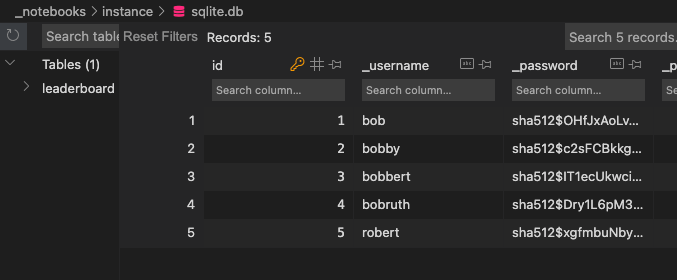

## Picture Database
- ![image](https://user-images.githubusercontent.com/111910633/233181629-36a561c0-8ba5-4644-ac43-274c74a55dff.png)
- Used CRUD methods which have create, read, update, and delete rows in the table.  There is a function called initEasyImages which populates the 'Images' table with data.
- The __init__ method is used to create a new row in the table with a given imagePath, xCoord, yCoord, and difficulty. The __repr__ method returns a string representation of the object when it is printed.
-  The table has five columns: id, _imagePath, _xCoord, _yCoord, and _difficulty.
![image](https://user-images.githubusercontent.com/111910633/233180602-c81c1931-85a4-4d8e-b738-a091eb803d60.png)
- ![image](https://user-images.githubusercontent.com/111910633/233181071-4442d4c3-8c54-497f-b3bf-d625e6742c05.png)
- This part of the code defines getter and setter methods for the columns in the Images model.  It sets and retrieves the metadata of the image.
- ![image](https://user-images.githubusercontent.com/111910633/233181852-9daeed5a-6ab7-4d46-8069-8bcf390ea07a.png)
- The initEasyImages function initializes the database with image metadata for easy difficulty images.




In [ ]:
from sqlalchemy import Column, Integer, String, Text, LargeBinary
from sqlalchemy.exc import IntegrityError
from pathlib import Path

class Images(db.Model):
    __tablename__ = 'images'
    id = Column(Integer, primary_key=True)
    _imagePath = Column(Text, unique=True, nullable=False)
    _xCoord = Column(Integer, nullable=False)
    _yCoord = Column(Integer, nullable=False)
    _difficulty = Column(Integer, nullable=False)

    
    def __init__(self, imagePath, xCoord, yCoord, difficulty):
        self._imagePath = imagePath
        self.xCoord = xCoord
        self.yCoord = yCoord
        self.difficulty = difficulty

    def __repr__(self):
        return "<image(id='%s', imagePath='%s', xCoord='%s', yCoord='%s', difficulty='%s')>" % (
            self.id,
            self.imagePath,
            self.xCoord,
            self.yCoord,
            self.difficulty
        )
    @property
    def imagePath(self):
        return self._imagePath

    @imagePath.setter
    def imagePath(self, value):
        self._imagePath = value

    @property
    def xCoord(self):
        return self._xCoord

    @xCoord.setter
    def xCoord(self, value):
        self._xCoord = value

    @property
    def yCoord(self):
        return self._yCoord

    @yCoord.setter
    def yCoord(self, value):
        self._yCoord = value

    @property
    def difficulty(self):
        return self._difficulty

    @difficulty.setter
    def difficulty(self, value):
        self._difficulty = value

    def to_dict(self):
        return {"id": self.id, "imagePath": self._imagePath, "xCoord": self._xCoord, "yCoord": self._yCoord, "difficulty": self._difficulty}

    def create(self):
        try:
            # creates a person object from User(db.Model) class, passes initializers
            db.session.add(self)  # add prepares to persist person object to Users table
            db.session.commit()  # SqlAlchemy "unit of work pattern" requires a manual commit
            return self
        except IntegrityError:
            db.session.remove()
            return None

    # CRUD read converts self to dictionary
    # returns dictionary
    def read(self):
        return {
            "path": self.imagePath,
            "xCoord": self.xCoord,
            "yCoord": self.yCoord,
            "difficulty": self.difficulty
        }

    # CRUD update: updates user name, password, phone
    # returns self
    def update(self, path="", xCoord="", yCoord="", difficulty=""):
        """only updates values with length"""
        xCoord = int(xCoord)
        yCoord = int(yCoord)
        if path:
            self.imagePath = path
        if xCoord >= 0:
            self.xCoord = xCoord
        if yCoord >= 0:
            self.yCoord = yCoord
        if difficulty in range(3):
            self.difficulty = difficulty
        db.session.commit()
        return self


    def delete(self):
        db.session.delete(self)
        db.session.commit()
        return None

In [ ]:
def initEasyImages():
    with app.app_context():
        db.create_all()
        image_dir = Path.cwd()/"images/easy"
        images_paths = [i.name for i in image_dir.iterdir()]
        images = [Images("images/easy/" + image, 250, 250, 0) for image in images_paths]
        for image in images:
             try:
                image.create()
                print("Successfully added entry")
             except:
                 db.session.remove()
                 print("Error adding image: ", image.imagePath)

initEasyImages()

#### Popcorn Hacks

- The init method initializes a new Images object with the following parameters: imagePath, xCoord, yCoord, and difficulty.
- In the Images class, the tablename attribute specifies the name of the table.
- The update method updates the values of the object's attributes imagePath, xCoord, yCoord, and difficulty based on the input parameters, and then uses the db.session.commit method to commit the changes to the database.
- The db module used in this code is part of a larger library called SQLAlchemy, which provides a set of tools for working with databases in Python.

## Picture Encoding

**Essential Question: What are some methods that we could store and access images in the backend, and how can we send them to a frontend application?**

The image encoding process for this project is done within the endpoints created on our backend application. The overarching process is split into three seperate sub-processes, each handling a different level of game-difficulty. For this lesson, we will look at the easy images sub-process as our example.

```python
def get_random_easy_image():
    images = Images.query.filter_by(_difficulty=0).all()
    image = random.choice(images)
    return image
```

This procedure is a void function that takes in no arguments directly, but does access the database via the `Images` object imported from the models that we created  

The first line filters all database entries and searches for all image entries with the difficulty column set to 0, which we established as the identifying factor for easy images. The `.all()` method attached to the end of the query serves to return all matching image objects in a list called `image`.

The procedure finally returns a random image using the `random.choice` method.

```python
class ImagesAPI:
    class _EasyImages(Resource):
        def get(self):
            image = get_random_easy_image()
            json_data = {}
            if image:
                image_path = project_path + "/" + image.imagePath
                with open(image_path, "rb") as image_file:
                    json_data["bytes"] = str(base64.b64encode(image_file.read()))[2:][:-1]
                json_data["xCoord"] = image.xCoord
                json_data["yCoord"] = image.yCoord
            return jsonify(json_data)
```

If the first procedure locates and selects the image, the second procedure then encodes, formats, and returns the JSON data containing the image and its metadata. 

The procedure first calls the `get_random_easy_image()` procedure created earlier to store our image object and also initializes an empty dictionary to store our json data.

If a valid image object is found, the procedure will attempt to create an absolute path to the image file on the computer running flask application. This is achieved by concatenating the absolute path of the working project directory to the relative image path stored in the database. The aboslute path of the directory is generated in our _namespace package_ (\_\_init\_\_.py) in our _nighthawkguessr\_api_ package. The line calculating the project path is shown below, and uses the `Path` object from the `pathlib` library.

```python
project_path = Path.cwd().as_posix()
```

After creating the image path, the procedure attempts to open the image file, and procedes to use the `base64.b64encode` method to encode the image file bytes into base64 data. This is convinient for us as HTML on the frontend pages allows us to render images with base64 bytes (Not sure about normal image bytes). The base64 bytes are then encoded into a python literal string in order to be jsonified and displayed on the api endpoint. The `[2:][:-1]` appended to the end is a type of string slicing which removes the **b'** generated at the start of the data and the **'** generated at the end of the data. These extraneous characters are used to indicate a base64 string, and are not part of the original data.

The procedure finally appends the metadata (position of the right coordinates on the map) to the `json_data` dictionary, completing the process.

Finally, the procedure returns the JSONified data, which is accessible from our API. As you can see, the images we process are extremely large and possess high resolution (typically a few megabytes!)
!["API endpoint"](./lessonimages/image_api_results.png)

### Popcorn Hack:
> Please write a few sentences answering the essential question, "What are some methods that we could store and access images in the backend, and how can we send them to a frontend application?"
In the backend, images are stored as image paths. When the image needs to be accessed the image path is accessed. The image and its metadata are converted into base64 and send to the frontend.
- 

## Endpoints

> What are endpoints and how do we use them to transfer data from one part of the internet to another?

Backend:

- The backend creates endpoints that are used to edit the properties of the database constructed by the model.
- `GET`, `POST`, `PUT`, and `DELETE` methods are used in order to define HTTP endpoints in the API.
  - These endpoints are based on requests that can be made to manipulate the database.
  - Variables defined in the model file are used to call data from the database in order to be manipulated.

### Methods in Backend Example

- Modules are being imported with specified classes which are used later in the program.
  - `Blueprint`: used to organize routes and functions
  - `request`: used to access data sent to the Flask app. through the HTTP request
  - `Api`: creates a Flask instance that handles requests
  - `Resource`: this allows for the definition of custom HTTP requests
  - `reqparse`: used to parse (sort and search) and validate data that is requested
- The blueprint and api are then defined as variables and are used to store any future data that is requested.
- Some preliminary functions, such as `find_by_username`, are created to be used later in the API code, allowing for simpler code.
  - In this case, these functions are used to search through the database to find specific usernames.

In [ ]:
# importing library dependencies
from flask import Blueprint, request
from flask_restful import Api, Resource, reqparse

# setting variables used to store future data
leaderboard_bp = Blueprint("leaderboards", __name__)
leaderboard_api = Api(leaderboard_bp)

# pre-made function created to search for usernames, allows for simplified program
def find_by_username(username):
    users = Leaderboard.query.filter_by(_username=username).all()
    return users[0]

#### GET Method

- This method is used to fetch specific data points from the database by searching through the usernames.
- This will be different for each type of database being made, however the general format stays the same.
  - Since this is a text database, to pull specific information from the database, the API will query through the data using the username, which is unique.
  - The function defined previously, `find_by_username()`, is used to search through the database and pull the specific data point that is being searched.
  - If the user exists, the data of that user will be returned, being sent to the frontend of the program.
  - If a user isn't found, an error will be returned that the user does not exist.
<br>
<br>
- In general, the program will always be searching for a piece of information that is unique and that will be used to pull data to wherever it is being requested.

In [ ]:
# GET method
def get(self):
        # requested username turned into variable for later use
        username = request.get_json().get("username")
        print(username, "uid")
        # username used to search for data and the found data is made into a variable
        user = find_by_username(username)
        if user:
            # data is sent to the frontend
            return user.to_dict()
        # error checking
        return {"message": user}, 404

#### POST Method

- This method is used to add a specific piece of information in the database based on searching by usernames.
- This is again different for each database that is made, however the general structure stays the same.
  - In this example, a parser is being used to extract data from an incoming request. In this case, the `RequestParser` class is used from the Flask module.
    - All required arguments are added to the parser, specifying what type of data it is.
    - The `args` variable is added in order to parse and store all incoming data.
  - The variable `leaderboard` is created to make a new object that will contain the values from the incoming data.
  - The function will attempt to add a new entry in the leaderboard database and return a status od a successful addition of the data.
  - If there is an error in the data being inputted, a status code of 500 will be returned.

In [ ]:
# POST method
def post(self):
        # using parsers to gather and data that is to be posted and validate it's true
        parser = reqparse.RequestParser()
        parser.add_argument("username", required=True, type=str)
        parser.add_argument("password", required=True, type=str)
        parser.add_argument("pointsEasy", required=True, type=int)
        parser.add_argument("pointsMedium", required=True, type=int)
        parser.add_argument("pointsHard", required=True, type=int)
        # variable made to store data
        args = parser.parse_args()

        # variable created to format all data into one place and send to database for logging
        leaderboard = Leaderboard(args["username"], args["password"],
                                  args["pointsEasy"], args["pointsMedium"], args["pointsHard"])
        try:
            # data is sent to the database for storage
            db.session.add(leaderboard)
            db.session.commit()
            return leaderboard.to_dict(), 201
        except Exception as e:
            # error checking
            db.session.rollback()
            return {"message": f"server error: {e}"}, 500

#### PUT Method

- This method is used to update a specific piece of information in the database based on searching by usernames.
- For each data base that is made, there will be different specific but the overall structure stays the same.
  - First, the `username` variable is defined, which retrieves the requested username and sets it as a variable that will be used later to edit a specific dataset.
  - The function `find_by_username()` is again used to search through the data to look for the username requested. This is set to a variable to be used later.
  - If the username is found in the database, the rest of the dataset is updated with the new values requested. This is updated into the database.
  - If there is an error found with the data requested of it the user isn't found, an error is returned.

In [ ]:
# PUT method
def put(self):
        # variable created to make requested username into something that can be used to search for data in future
        username = request.get_json().get("username")
        print(username, "uid")

        try:
            # attempts to find the data in the database
            user = find_by_username(username)
            if user:
                # if the data is found, the data points are updates
                user.pointsEasy = int(request.get_json().get("pointsEasy"))
                user.pointsMedium = int(request.get_json().get("pointsMedium"))
                user.pointsHard = int(request.get_json().get("pointsHard"))
                db.session.commit()
                return user.to_dict(), 201
            else:
                # if user not found, error is returned
                return {"message": "leaderboard not found"}, 404
        except Exception as e:
            # checks for errors in request
            db.session.rollback()
            return {"message": f"server error: {e}"}, 500

#### DELETE Method

- This method is used to delete a specific information from the database, again searching by username.
- The overall structure stays the same between different databases, but the specific variables will need to be changed to personalize the database.
  - A variable for the username is created in order to search for for the user name requested later in the code with the function `find_by_username()`.
  - If the user is found, the user is deleted, along with that user's data and the change is saved to the database.
  - If the user isn't found or if an error is found with the data requested, an error is returned.

In [ ]:
# DELETE method
def delete(self):
        # username variable defined to store requested value
        username = request.get_json().get("username")
        print(username, "uid")

        try:
            # finds the username and stores data in variable
            user = find_by_username(username)
            if user:
                # if the user is found, the user and their data is deleted
                db.session.delete(user)
                db.session.commit()
                return user.to_dict()
            else:
                # if user not found, error is returned
                return {"message": "leaderboard not found"}, 404
        except Exception as e:
            # error checking for request error
            db.session.rollback()
            return {"message": f"server error: {e}"}, 500

#### Displaying the Full Database

- Another class is created in order to display the entire database at once and also to delete the entire database if necessary.
- This uses the same functions as before to GET and DELETE the data, however it is modified slightly to look through the entire database abd display or delete all data points.
- An example of where this would be useful is to create a table of data in the frontend.

In [ ]:
# full list of leaderboard
class LeaderboardListAPI(Resource):
    # GET method
    def get(self):
        try:
            # attempts to find the entire database requested and is stored in variable
            leaderboards = db.session.query(Leaderboard).all()
            # sends back the entire database
            return [leaderboard.to_dict() for leaderboard in leaderboards]
        except Exception as e:
            # error checking for request errors
            db.session.rollback()
            return {"message": f"server error: {e}"}, 500

    # DELETE method
    def delete(self):
        try:
            # deletes entire database
            db.session.query(Leaderboard).delete()
            db.session.commit()
            return []
        except Exception as e:
            # checks for errors in request
            db.session.rollback()
            return {"message": f"server error: {e}"}, 500

#### Popcorn Hacks

Please answer these questions to earn points for the popcorn hacks.

1. What are the four HTTP request methods that are used with Flask?

Get, Post, Put, Delete.

2. What is a parser and how would it be aid with data validation?

A parser used to extract data from an incoming request. 

3. What is the role endpoints in Flask?

The way a user can interact with a database's data.


### Frontend and How it Communicates to Backend

> This first part of the frontend logic simply finds out of the site is running locally or not, off of which is figures out whether or not to pull data from the local backend link or the global backend link. In this example, a global backend link hasn't been sent, however it would go in the second set of quotations after the local address. This isn't something you need to know, but it is nice to use when developing full stack applications.

In [ ]:
// checks if site is run locally
const isLocalhost = Boolean(
  window.location.hostname === "localhost" ||
  window.location.hostname === "[::1]" ||
  window.location.hostname.match(/^127(?:\.(?:25[0-5]|2[0-4][0-9]|[01]?[0-9][0-9]?)){3}$/)
)
// defines database url
const api = isLocalhost ? "http://localhost:8200" : "";

#### GET Method

- This method is more complicated in terms of requesting, simply because in order to, for example, print all data points into a table, the function needs to iterate through the entire database.
- In this example, the function `getList()` is used to asynchronously fetch the entire database and set it to a variable called `list`.
  - The list is returned for later use outside of this function in order to print the data.

##### Printing the Data

- In order to print the data, the function `getList()` is run and once it is run, it iterates through the data to pull out each individual data point and enter it into the function used to make the table.
  - For each class in the database, which is each row in the database, the variables corresponding to that specific class are pulled and inserted into the `addTask()` function as parameters to create the table of users.
- The function `addTask()` is used to create the visual table that the user sees.
  - A row is created and for each table cell in that row, the data is added by iterating through the array of variables that are parameters pulled directly from the database.
  - A new row is added into table for each new class of information pulled from the database.

In [ ]:
// fetches entire database
const getList = async () => {
  // stores it in variable list
  const list = await fetch(api + "/leaderboardList").then((r) => r.json());
  return list
};

// goes through entire database and pulls each individual class
getList().then(list => {
  // for each class (row), data is pulled and added into addTask() function to be put in visual table
  list.forEach(cls => {
    addTask(cls.username, cls.pointsEasy, cls.pointsMedium, cls.pointsHard)
  })
})

// adds visual representation of data in table
function addTask(username, pointsEasy, pointsMedium, pointsHard) {

  // array of variables defining data points
  var tableCells = [username, pointsEasy, pointsMedium, pointsHard]
  // creates new row in variable
  var row = document.createElement('tr')
  // goes through entire data set and places data into cells
  for (var i = 0; i < tableCells.length; i++) {
    var tableCell = document.createElement('th')
    tableCell.textContent = tableCells[i]
    tableCell.className = 'cell'
    row.appendChild(tableCell)
  }
  // creates new row as child of schedule element
  schedule.appendChild(row)
}

#### POST Method

- This method is used to push data to the backend using the HTTP POST method.
  - The function `addData` is defined with the parameters that are going to be pushed into the backend.
  - An object is created to define the variables that are going to be pushed into the backend. This is basically the JSON string that will be sent to the backend to get decoded and inserted into the database.
  - The `fetch()` function is called with the `api` variable, which is a variable representing the url for the backend API, and the extension specific to where the data will be posted, in this case being `/leaderboard`.
    - The method, headers, and body of the data are defined in order to complete a successful HTTP request to the backend. The object `data` which was created earlier, is converted to a JSON string here and sent to the backend.
  - If an error is detected, it is returned and the request will fail.

In [ ]:
// calls addData function
function addData(username, password, pointsEasy, pointsMedium, pointsHard){

// creates object defining the variables that will be added to the backend, corresponding with the backend variables
let data = {
  "username": username,
  "password": password,
  "pointsEasy": pointsEasy,
  "pointsMedium": pointsMedium,
  "pointsHard": pointsHard
}

// POST method called
fetch(api + '/leaderboard', {
  method: 'POST',
  headers: {
    'Content-Type': 'application/json',
  },
  body: JSON.stringify(data),
})
  // error checking
  .then((response) => response.json())
  .catch((error) => {
    console.error('Error:', error);
  });
}

#### PUT and DELETE Methods

- These two methods are almost identical to the POST method above in the way they work, the only difference being that the method requested is different. The name of the function defined is also changes, in this case being `editData()` and `deleteData()`.

In [ ]:
// editing function defined
function editData(username, password, pointsEasy, pointsMedium, pointsHard){

  // has object with variables that are required in backend
  let data = {
    "username": username,
    "password": password,
    "pointsEasy": pointsEasy,
    "pointsMedium": pointsMedium,
    "pointsHard": pointsHard
  }
  
  // PUT method called
  fetch(api + '/leaderboard', {
    method: 'PUT',
    headers: {
      'Content-Type': 'application/json',
    },
    body: JSON.stringify(data),
  })
    // error checking
    .then((response) => response.json())
    .catch((error) => {
      console.error('Error:', error);
    });
  }

In [ ]:
// deleting function defined
function deleteData(username, password, pointsEasy, pointsMedium, pointsHard){

  // object defined with variables that are same as backend
  let data = {
    "username": username,
    "password": password,
    "pointsEasy": pointsEasy,
    "pointsMedium": pointsMedium,
    "pointsHard": pointsHard
  }
  
  // DELETE method called
  fetch(api + '/leaderboard', {
    method: 'DELETE',
    headers: {
      'Content-Type': 'application/json',
    },
    body: JSON.stringify(data),
  })
    // error checking
    .then((response) => response.json())
    .catch((error) => {
      console.error('Error:', error);
    });
  }

### Calling Images (GET Method)

- The process for calling images is basically the same as anything else, except you need to be able to reconstruct the images based on the base64 that is requested from the backend.
- In this case, the image in the api is being called to the frontend and is returned as the variable `list`.
  - This is then inserted directly into the html by getting the element that needs to be edited and styling with css by using the built-in function `data:image/png;base64, ` which translated from bytes to pixel.

In [ ]:
// GET method calling info from backend url
const getList = async () => {
  const list = await fetch(api + "/api/images/GetEasyImage").then((r) => r.json());
  return list
};

// inserting image into frontend
getList().then(list => {
  document.getElementsByTagName("body")[0].style = "background-image: url('data:image/png;base64, " + list.bytes +"');"
})

#### Popcorn Hacks

Please answer these questions to earn points for the popcorn hacks.

1. How is data for images stored in a Flask API and how is it displayed on the frontend when requested?

It's stored as an image file, and requested in base64, and displayed on the frontend using CSS to convert it from base64 to a visible image.

2. What is the `fetch()` function and how is it used in frontend logic?

The fetch() function is used to fetch data from the backend and it can allow you to conduct GET POST PUT and DELETE methods on your database from the frontend.

3. How is data formatted and sent to the backend? (mention JSON in your answer)

The data is formatted and sent to the backend as a JSON object defined as "body".



## Time and Space Complexity of Algorithms
The lesson for time and space complexity of algorithms will consist of demonstrations of sorting algorithms and the different time complexities that they come with on a small scale. This can be acomplished using things such as a deck of cards or even with actual people. An example of how this will work is laying out the cards in a random order on the table, and demonstrating different ways of sorting it. From methods such as bubble sort to methods such as bogo sort, it will be really easy to see exactly how much time it would take for these different sorting algoritms to complete. Then after that, it is easy to understand the concept of time complexity when given a real world example.

Space complexity can be demonstrated by using the same method, however, adding in the extra step of having the cards in a pile. This will show how much space is needed to complete the sorting algorithm. This will easily reveal the concept of space complexity because it allows people to witness a real world, physical example of the concept, turning a really hard to grasp concept into something that is easy to understand.

Additionally, we are also going to analyze certain algorithms within our project to show how such analysis is applicable to real world projects.


**Essential Question: What is the quicksort algorithm, and how does it work? How does it's time and space complexities scale with input sizes?**
### QuickSort Algorithm
The main algorithm we've employed is an recursive implementation of quickSort in the backend to sort the database entries to obtain the user with the highest overall score. Typically this algorithm is implemented to sort in ascending order, but to make it easier to extract the top 10 users, we sill be modifying the algorithm to sort in descending order (so the top players show up first in the list).

```python
class LeaderboardTop10(Resource):
    def partition(self, arr, lo, hi):
        pivot = arr[hi][1]                                              # Pivot value set to the 2nd index of the last element
        pivot_pos = lo - 1                                              # Set our base pivot position, ensure that lower picoit index == lo
        for idx in range(lo, hi):                                       # Iterate over all elements in the partition array
            if arr[idx][1] >= pivot:                                    # Found an element creater than pivot
                pivot_pos+=1                                            # Increment correct position for pivot
                arr[pivot_pos], arr[idx] = arr[idx], arr[pivot_pos]     # Swap the larger element with the element at the current pivot position
        arr[pivot_pos + 1], arr[hi] = arr[hi], arr[pivot_pos + 1]       # Swap element at pivot position with the pivot element
        return pivot_pos+1                                              # Return index of pivot element
    
    def qSortUserList(self, arr, lo, hi):
        if lo < hi:
            last_pivot = self.partition(arr, lo, hi)
            self.qSortUserList(arr, lo, last_pivot-1)
            self.qSortUserList(arr, last_pivot+1, hi)

    def get(self):
        users_list = get_user_list()
        top10 = {}
        self.qSortUserList(users_list, 0, len(users_list)-1)
        for user in users_list:
            top10[user[0]] = user[1]
        print(top10)
        if len(top10) <= 10:
            return top10
        return top10[:10]
```

To understand how the algorithm first, we must first familiarize ourselves with the process.
1. Our backend grabs all users from our leaderboard 
2. Returns all users and their scores in a 2-D array, each element is a list of length two that contains the username and cumulative score of the player
3. The sorting algorithm will use the second element representing the user score to sort the array of users.  
```
┌─────────────────────┐               ┌──────────────────┐              ┌─────────────────┐  
│                     │               │                  │              │                 │  
│                     │               │      Split       │              │    display      │  
│      Database       │               │       the        ├──────────────►    sorted list  │  
│                     │               │    List into     │              │    on endpoint  │  
│                     │               │   top 10 users   │              │                 │  
└──────────┬──────────┘               └─────────▲────────┘              └─────────────────┘  
           │                                    │  
           │                                    │  
           │                                    │  
           │                                    │  
┌──────────▼──────────┐               ┌─────────┴────────┐  
│                     │               │                  │  
│   2-D User  Array   │               │    QuickSort     │  
│                     ├───────────────►                  │  
│ [(username, score)] │               │    Algorithm     │  
│                     │               │                  │  
└─────────────────────┘               └──────────────────┘  
```
Our quickSort algorithm consists of 2 procedures, a `partition()` procedure that **pivots** and sorts individual elements, and a `qSortUserList()` that performs recursion which finishes the sorting.

### The Logic
The partition procedure will serve to "partition" our list into 2 parts, a smaller portion and a larger portion around a certain pivot value (Note: These portions don't have to sorted yet!). 

#### Partition procedure
First, partition selects a certain element in a list to be a pivot. This pivot value will be used to make comparisons to every other value in the array. For simplicity, we have selected our pivot element as the last element in the unsorted list. The procedure defines a `pivot_pos` variable to denote the correct position of the pivot index after each iteration. Although it may seem weird that the variable intially starts with a value of 0-1 = -1, this negative index is resolved by the return statement, which always returns an index that's one higher than pivot_pos. This serves to ensure that the lowest pivot index would be 0, which is the smallest element in any given partition. 
```python
pivot = arr[hi][1]
pivot_pos = lo - 1
```
The partition will then iterate over each element in the list from the starting and ending indexes indicated by the parameters. if a particular value is found to be larger than the pivot, the algorithm well then increment the recorded pivot position and swap the pivot with the found element. 
```python
for idx in range(lo, hi):
    if arr[idx][1] >= pivot:
        pivot_pos+=1
        arr[pivot_pos], arr[idx] = arr[idx], arr[pivot_pos]
```
Finally, the partition procedure swaps the element at the `pivot_pos+1` index with our pivot element at the `hi` index to place the pivot at it's rightful place. We know that `pivot_pos+1` must be smaller than `hi` because it did not trigger the conditional to increment the `pivot_pos+1`` index. At last, the pivot_pos is incremented and returned to serve as an indicator of where our two partitions split.

```python
arr[pivot_pos + 1], arr[hi] = arr[hi], arr[pivot_pos + 1]
return pivot_pos+1
```

#### qSort procedure
If the parition procedure splits our list into smaller and larger regions, then our qSort procedure ensures that these regions are in order. It's hard to explain, but the procedure iterates over each paritition, repeating the paritition process, setting new pivot values, and correctly places the pivot values at their correct sorted order.

The procedure first checks if the lower index is smaller than the higher index, to ensure that our parition has a length greater than 1. If this check passes, the procedure then calls the `partition` procedure to both split our list into the two distinct regions and also the index of our correctly placed pivot value. The procedure then invokes itself again on the larger interval (replacing hi to be the partition index-1 since the previous pivot is already sorted), and also on the smaller interval (replacing lo to be partition index+1).

Eventually, the qSort procedure will iterate through all elements in the list while parition places each element at the correct position, giving us the final sorted list. 

#### Complexity analysis
To analyze time complexity, we must analyze the partition and qSort procedures.

For the qSort procedure, because we divide the array into 2 halves during each function call, our number of function calls scales proportionally to log(n), where n is the length of the input array. However, within each function call, we also call the partition procedure, which contains an for-loop that iterates over each element in the partioned array, comparing it to a pivot value. We are well familiar with since loops, and can safely say that runtime scales proportionally to the length of the partition array. Due to this, we can conclude that our iteration time complexity scales linearly. Thus for each iterative process, our timerun scales proportionally to n. 

Finally, we could multiply our two complexities together to get a representation of our overall complexity. Thus, the asymptotic notation for a time complexity could be represented as O(nlogn), where n is the length of the input array. Keep in mind, Big-Oh notation is not a function that returns the accurate runtime for any given input, but rather only gives us a model to see how runtime scales with increasing input sizes.

Space complexity for this program is much easier to analyze. Because the array is sorted in-place (meaning we don't create other placeholders or copies), we require no additional space to sort this array. However, recursive function calls may require extra storage on the call stack. Since we found the number of recursive calls to be asymptotic to O(logn), we can conclude that quickSort has an **O(1)** space complexity for an iterative method, and an **O(logn)** space complexity for a recursive method.

### Popcorn Hack

Please answer our EQ for this section: **What is the quicksort algorithm, and how does it work? How does it's time and space complexities scale with input sizes?**
The quicksort algorithm is a recursive algorithm that divides the array into 2 halves, and sorts each half separately by a similar process to binary search, where each half is split into two that are then split until the algorithm can re-order the entire array. Time complexity: O(nlogn), Space complexity O(logn).
- 

## Hacks - Frontend and Backend

Please clone these two repositories:
- [Frontend](https://github.com/DavidVasilev1/hacks-FE)
- [Backend](https://github.com/DavidVasilev1/hacks-BE)

Directions:

You will be creating a full stack of a text and image database which you will code in the Flask Backend and pull information to sort in the Frontend.

You need to have coded a fully working CRUD in the Flask, which you can show working with Postman, however you only need to show the Frontend reading and displaying data from the backend.

You may use the code we showed to you today in class in order to code the both the Frontend and Backend.

Follow the directions in the comments in the Flask Backend and the ReadMe in the frontend before starting.

## Hacks - QuickSort

On this notebook, try recreating the original quicksort algorithm from our modified version. For an additional challenge, try abstracting the partitioning process through list comprehension!

After creating a successful algorithm, either create a diagram showing how the algorithm works, or a diagram that illustrates the time and/or space complexity of a recursive approach.

## Hacks Helpers

If you need help with your hacks, you can check out our project repos to see how we did it.

- [Frontend Table](https://github.com/DavidVasilev1/Nighthawk-guessr/blob/gh-pages/leaderboard.html)
- [Frontend Image](https://github.com/DavidVasilev1/Nighthawk-guessr/blob/gh-pages/game.html)
- [Backend](https://github.com/DavidVasilev1/flask3/tree/master/nighthawkguessr_api)

You can also message us on the coding Slack channel for additional help.

## Points

- Popcorn Hacks - 0.1 pts
- Full Stack - 0.4+
  - 0.5 extra for styling html page
- QuickSort Hacks - 0.3+
  - 0.5 extra for implementing quicksort

# HACKS ARE DUE SATURDAY (4/29) 11:59 PM

In [2]:
def QS(list, left, right):   #takes array, and 2 indices
    if left < right:  # if this isnt true then array is either 0 or 1 length (therefore already sorted)
        pivot_index = partition(list, left, right)    # partition the list/array and get the pivot's index
        QS(list, left, pivot_index - 1)    # move each subarrays to left and right of pivot
        QS(list, pivot_index + 1, right)
        
def partition(list, left, right): 
    pivot = list[right] # choose the right most element as the pivot
    i = left - 1
    for x in range(left, right):  # partition the array into elements less than or greater than the pivot
        if list[x] <= pivot:
            i += 1
            list[i], list[x] = list[x], list[i]
    list[i + 1], list[right] = list[right], list[i + 1]  # Move the pivot to its final position
    return i + 1  # Return the pivot index

list = [5, 4000, 86, 11, 43, 28, 4, 1, 368]
QS(list, 0, len(list) - 1)    #allows you to choose which part of list to order, (this case is ordering full list)
print(list) 

[1, 4, 5, 11, 28, 43, 86, 368, 4000]


## HOW IT WORKS

pivot = 43

5, 4000, 86, 11, 43, 28, 4, 1, 368

result

5, 11, 28, 4, 1 43 4000, 86, 368

pivot = 5, 368

4, 1, 5 11, 28 43 86, 368 4000

pivot = 4

1 4 5, 11, 28, 43, 86, 368, 4000

SORTED: 1, 4, 5, 11, 28, 43, 86, 368, 4000#